# Installations!

In [1]:
!pip install mecab-python3

In [2]:
#These wheels include a copy of the MeCab library, but not a dictionary. 
#In order to use MeCab you'll need to install a dictionary. unidic-lite is a good one to start with:
!pip install unidic-lite

In [3]:
# normalization tool
!pip install neologdn

In [4]:
!pip install openpyxl

In [5]:
# To be able to see Japanese!
!pip install japanize_matplotlib

# Libraries

In [47]:
import os
import pandas as pd

# Preprocessing
import MeCab
import neologdn
import collections
from nltk import FreqDist
from nltk.corpus import stopwords

# Visualization
import matplotlib.pyplot as plt
import japanize_matplotlib
#import seaborn as sns # REMINDER: make sure to remove if not using!

# Just having fun

In [7]:
path = "/root/code/mochiyam/simply-japanese/data/2_RawData"
df = pd.read_excel(os.path.join(path, 'SNOW_T15_150.xlsx'))
df.head()

,#日本語(原文),#やさしい日本語,#英語(原文)
0,月曜日までにこの仕事を終えて下さい。,月曜日までにこの仕事を終わらせてください。,please get this work finished by monday .
1,失敗してもあきらめてはいけない。,失敗してもダメと思ってはならない。,don 't give up if you fail .
2,あなたは何を見つめているのですか。,あなたは何を見ているのですか。,what are you gazing at ?
3,その女の子は母と似ていた。,その少女は母と似ていた。,the girl resembled her mother .
4,彼は貧しかったので、大学へ行けなかった。,彼はお金がなかったので、大学へ行くことができなかった。,"poor as he was , couldn 't go to college ."


In [8]:
df.drop(columns=['#英語(原文)'], inplace=True)
df.head()

,#日本語(原文),#やさしい日本語
0,月曜日までにこの仕事を終えて下さい。,月曜日までにこの仕事を終わらせてください。
1,失敗してもあきらめてはいけない。,失敗してもダメと思ってはならない。
2,あなたは何を見つめているのですか。,あなたは何を見ているのですか。
3,その女の子は母と似ていた。,その少女は母と似ていた。
4,彼は貧しかったので、大学へ行けなかった。,彼はお金がなかったので、大学へ行くことができなかった。


In [9]:
df.rename(columns={"#日本語(原文)": "original", "#やさしい日本語": "simplified"}, inplace=True)
df.head()

,original,simplified
0,月曜日までにこの仕事を終えて下さい。,月曜日までにこの仕事を終わらせてください。
1,失敗してもあきらめてはいけない。,失敗してもダメと思ってはならない。
2,あなたは何を見つめているのですか。,あなたは何を見ているのですか。
3,その女の子は母と似ていた。,その少女は母と似ていた。
4,彼は貧しかったので、大学へ行けなかった。,彼はお金がなかったので、大学へ行くことができなかった。


In [10]:
tagger = MeCab.Tagger()
text = df['original'][0]
parsed = tagger.parse(text)
print(parsed)

月曜	ゲツヨー	ゲツヨウ	月曜	名詞-普通名詞-副詞可能			3,0
日	ヒ	ヒ	日	名詞-普通名詞-副詞可能			0,1
まで	マデ	マデ	まで	助詞-副助詞			
に	ニ	ニ	に	助詞-格助詞			
この	コノ	コノ	此の	連体詞			0
仕事	シゴト	シゴト	仕事	名詞-普通名詞-サ変可能			0
を	オ	ヲ	を	助詞-格助詞			
終え	オエ	オエル	終える	動詞-非自立可能	下一段-ア行	連用形-一般	0
て	テ	テ	て	助詞-接続助詞			
下さい	クダサイ	クダサル	下さる	動詞-非自立可能	五段-ラ行	命令形	3
。			。	補助記号-句点			
EOS



名詞 - noun
助詞 - particle
連体詞 - 
動詞
補助記号

In [11]:
# Just testing stuff out
test = MeCab.Tagger("-O wakati")
text = neologdn.normalize(text, repeat=2)
parsed = test.parse(text)
print(parsed.split())

['月曜', '日', 'まで', 'に', 'この', '仕事', 'を', '終え', 'て', '下さい', '。']


In [12]:
!pip show unidic-lite

Name: unidic-lite
Version: 1.0.8
Summary: A small version of UniDic packaged for Python
Home-page: https://github.com/polm/unidic-lite
Author: Paul O'Leary McCann
Author-email: polm@dampfkraft.com
License: UNKNOWN
Location: /root/.pyenv/versions/3.8.12/envs/simply-japanese/lib/python3.8/site-packages
Requires: 
Required-by: 


In [13]:
test = MeCab.Tagger("r'-d /root/.pyenv/versions/3.8.12/envs/simply-japanese/lib/python3.8/site-packages'")
text = neologdn.normalize(text, repeat=2)
parsed = test.parse(text)
print(parsed)

月曜	ゲツヨー	ゲツヨウ	月曜	名詞-普通名詞-副詞可能			3,0
日	ヒ	ヒ	日	名詞-普通名詞-副詞可能			0,1
まで	マデ	マデ	まで	助詞-副助詞			
に	ニ	ニ	に	助詞-格助詞			
この	コノ	コノ	此の	連体詞			0
仕事	シゴト	シゴト	仕事	名詞-普通名詞-サ変可能			0
を	オ	ヲ	を	助詞-格助詞			
終え	オエ	オエル	終える	動詞-非自立可能	下一段-ア行	連用形-一般	0
て	テ	テ	て	助詞-接続助詞			
下さい	クダサイ	クダサル	下さる	動詞-非自立可能	五段-ラ行	命令形	3
。			。	補助記号-句点			
EOS



In [14]:
# Super dumb dumb method
def count_all_word_frequency():
    all_words = collections.Counter()
    t = MeCab.Tagger()
    for idx, row in df.iterrows():
        text = row['original']
        node = t.parseToNode(text)
        while node:
            all_words[node.surface] += 1
            node = node.next
    return all_words
all_words = count_all_word_frequency()
# tuples in a list
print(all_words.most_common(25))

[('', 300), ('。', 147), ('は', 113), ('た', 60), ('を', 52), ('に', 50), ('の', 49), ('て', 48), ('彼', 48), ('私', 42), ('が', 41), ('し', 28), ('で', 23), ('か', 21), ('ない', 17), ('と', 16), ('だ', 16), ('ます', 16), ('です', 15), ('いる', 13), ('い', 13), ('彼女', 13), ('その', 11), ('も', 8), ('こと', 8)]


In [15]:
!pip install nltk

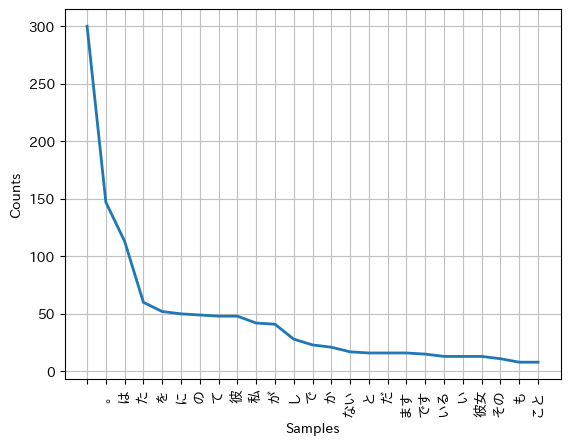

In [43]:
def plot_word_frequency(word_freq, most_common_num):
    freq_dist = FreqDist(word_freq)
    freq_dist.plot(most_common_num,cumulative=False)
plot_word_frequency(all_words, 25)

In [17]:
# Super dumb dumb method
def count_all_word_frequency():
    all_words = collections.Counter()
    t = MeCab.Tagger()
    for idx, row in df.iterrows():
        text = row['original']
        node = t.parseToNode(text)
        while node:
            all_words[node.surface] += 1
            node = node.next
    return all_words
all_words = count_all_word_frequency()
# tuples in a list
print(all_words.most_common(25))

[('', 300), ('。', 147), ('は', 113), ('た', 60), ('を', 52), ('に', 50), ('の', 49), ('て', 48), ('彼', 48), ('私', 42), ('が', 41), ('し', 28), ('で', 23), ('か', 21), ('ない', 17), ('と', 16), ('だ', 16), ('ます', 16), ('です', 15), ('いる', 13), ('い', 13), ('彼女', 13), ('その', 11), ('も', 8), ('こと', 8)]


In [38]:
test = MeCab.Tagger("-O wakati")
print(text)
text = "あなたは何を見つめているのですか。"
parsed = test.parse(text)
node = test.parseToNode(text).next
while node.next:
    print(node.surface, node.feature.split(',')[0])
    node = node.next
#node.surface.decode("utf-8", "ignore")


月曜日までにこの仕事を終えて下さい。
あなた 代名詞
は 助詞
何 代名詞
を 助詞
見つめ 動詞
て 助詞
いる 動詞
の 助詞
です 助動詞
か 助詞
。 補助記号


In [31]:
#               助詞           
#              /
# Remove 付属語 
#　　　　　　　 \
#             　 助動詞

#月 が｜きれいな｜晩 でし た 。
#付属語 : が　・　でした

# With 10_000 Data!


In [54]:
path = "/root/code/mochiyam/simply-japanese/data/2_RawData"
df = pd.read_excel(os.path.join(path, 'SNOW_T15_10000.xlsx'))
df.head()

,#日本語(原文),#やさしい日本語,#英語(原文)
0,父は私が外国へ行くことを承知した。,父は私が外国へ行くことを許した。,my father consented to my going abroad .
1,卑屈な奴。,自分のことをダメだと考える人。,don 't be a dog .
2,それは本当のはずはない。,それは本当のはずはない。,it cannot be true .
3,車がそんなに混んでなければ問題ないでしょう。,車がそんなに混んでなければ問題ないでしょう。,we shouldn 't have any trouble if the traffic ...
4,２時間も待たされた。,２時間も待った。,i was kept waiting for as long as two hours .


In [56]:
df.drop(columns=['#英語(原文)'], inplace=True)
df.rename(columns={"#日本語(原文)": "original", "#やさしい日本語": "simplified"}, inplace=True)
df.head()

,original,simplified
0,父は私が外国へ行くことを承知した。,父は私が外国へ行くことを許した。
1,卑屈な奴。,自分のことをダメだと考える人。
2,それは本当のはずはない。,それは本当のはずはない。
3,車がそんなに混んでなければ問題ないでしょう。,車がそんなに混んでなければ問題ないでしょう。
4,２時間も待たされた。,２時間も待った。


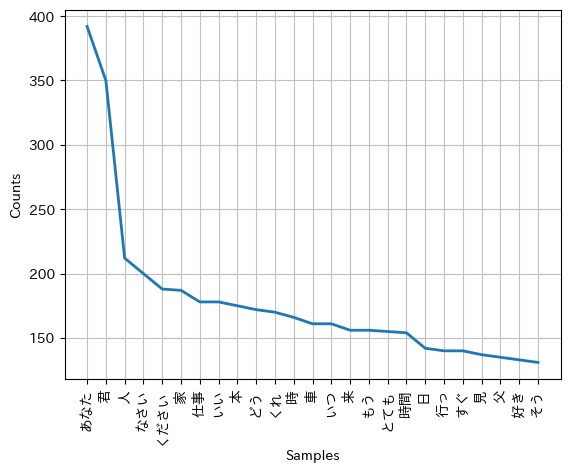

In [82]:
# Counts all the independent word 自立語
_stopwords = stopwords.words('japanese')

def count_all_words(docs, col='original'):
    all_words = collections.Counter()
    t = MeCab.Tagger("-O wakati")
    for idx, row in docs.iterrows():
        text = row[col]
        node = t.parseToNode(text).next
        while node.next:
            part_of_speech = node.feature.split(',')[0]
            if part_of_speech in ["助動詞", "助詞", "補助記号"] or node.surface in _stopwords:
                node = node.next
                continue
            all_words[node.surface] += 1
            node = node.next
    return all_words
ind_word_freq = count_all_words(df)
plot_word_frequency(ind_word_freq, 25)

In [68]:
top_2000_word_freq = ind_word_freq.most_common(2000)
top_2000_word_freq[-25:]

[('がた', 2),
 ('冷め', 2),
 ('この世', 2),
 ('暑く', 2),
 ('けっして', 2),
 ('受かっ', 2),
 ('睡眠', 2),
 ('おもしろく', 2),
 ('失業', 2),
 ('青ざめ', 2),
 ('打っ', 2),
 ('白', 2),
 ('奈良', 2),
 ('消さ', 2),
 ('野菜', 2),
 ('運ぶ', 2),
 ('止める', 2),
 ('損なっ', 2),
 ('カ国', 2),
 ('至急', 2),
 ('予報', 2),
 ('式', 2),
 ('捨て', 2),
 ('物事', 2),
 ('メニュー', 2)]

In [ ]:
# 1. Find sentences that are exactly the same 
# 2. temp_list of tokens for sentence original and simplified
# 3. Compare the two temp_list
# 4. two global_lists of deleted and added(simplified)

In [118]:
# temp = df.head(10)
# temp

In [119]:
# Step 1.  Get the corpuses that are different from original and simplified 
diff_corpus_df = df[df['original'] != df['simplified']]
diff_corpus_df

,original,simplified
0,父は私が外国へ行くことを承知した。,父は私が外国へ行くことを許した。
1,卑屈な奴。,自分のことをダメだと考える人。
4,２時間も待たされた。,２時間も待った。
6,彼はいつも父親の陰口を言います。,彼はいつも父のいないところで悪いことを言います。
7,彼女はもう少しで遅刻するところだった。,彼女はもう少しで遅れるところだった。
...,...,...
9993,わたしは犬と猫を飼っています。,私は犬と猫と一緒に住んでいます。
9994,何と平山先生は良い先生でしょう。,何と平山先生はいい先生でしょう。
9995,彼女は服にたくさん金を使う。,彼女は服に多くの金を使う。
9996,彼は長年、腰痛で困っている。,彼は長い間、腰が痛くて困っている。


In [120]:
# 2. Create a temp_list of tokens for sentence original and simplified
original_temp_list = count_all_words(diff_corpus_df, 'original')
simplified_temp_list = count_all_words(diff_corpus_df, 'simplified')

In [99]:
# simplified_temp_list

In [121]:
# dict(original_temp_list)

In [122]:
# pd.DataFrame(dict(original_temp_list).items(), columns=['word', 'count'])

In [124]:
# 3. Compare the two temp_list

# Collections library
# Elements are subtracted from an iterable or from another mapping (or counter). 
# Like dict.update() but subtracts counts instead of replacing them. Both inputs and outputs may be zero or negative.
diff_temp = simplified_temp_list
diff_temp.subtract(original_temp_list)

In [134]:
diff_temp_df[diff_temp_df['count'] < 0].sort_values(by='count').head()

,word,count
305,君,-683
1920,下さい,-250
1927,達,-226
1926,一,-216
1818,いけ,-165


In [125]:
# 4. two global_lists of deleted and added(simplified)
deleted = []
added = []

diff_temp_df = pd.DataFrame(dict(diff_temp).items(), columns=['word', 'count'])
deleted =  diff_temp_df[diff_temp_df['count'] >= 0]['word'].tolist()
added = diff_temp_df[diff_temp_df['count'] < 0]['word'].tolist()

In [128]:
len(deleted), len(added)

(944, 3772)